# Load the data

In [1]:
import json
from tqdm import tqdm
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

import torch

from s4hci.utils.data_handling import load_adi_data, save_as_fits
from s4hci.models.psf_subtraction import S4
from s4hci.models.noise import S4Noise

from applefy.utils.fake_planets import add_fake_planets

# All datasets

In [2]:
datasets = [
    "/fast/mbonse/s4/30_data/HD22049_303_199_C-0065_C_.hdf5",
    "/fast/mbonse/s4/30_data/HD22049_310_0100_C-0656_A_.hdf5",
]

---------------------------
/fast/mbonse/s4/30_data/HD22049_303_199_C-0065_C_.hdf5
---------------------------
Loading data ... [DONE]
S4 model: validating noise model ... S4 Noise: validating noise model ... Compute validation positions for separation 3.4615384615384617 ...
Compute betas for separation 3.4615384615384617 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:06<00:00,  6.61s/it]


Re-mask betas for separation 3.4615384615384617 ...
Compute validation errors for separation 3.4615384615384617 ...
Compute validation positions for separation 6.923076923076923 ...
Compute betas for separation 6.923076923076923 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:05<00:00,  6.59s/it]


Re-mask betas for separation 6.923076923076923 ...
Compute validation errors for separation 6.923076923076923 ...
Compute validation positions for separation 10.384615384615385 ...
Compute betas for separation 10.384615384615385 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:05<00:00,  6.59s/it]


Re-mask betas for separation 10.384615384615385 ...
Compute validation errors for separation 10.384615384615385 ...
Compute validation positions for separation 13.846153846153847 ...
Compute betas for separation 13.846153846153847 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:05<00:00,  6.56s/it]


Re-mask betas for separation 13.846153846153847 ...
Compute validation errors for separation 13.846153846153847 ...
Compute validation positions for separation 17.307692307692307 ...
Compute betas for separation 17.307692307692307 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:05<00:00,  6.57s/it]


Re-mask betas for separation 17.307692307692307 ...
Compute validation errors for separation 17.307692307692307 ...
Compute validation positions for separation 20.76923076923077 ...
Compute betas for separation 20.76923076923077 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:05<00:00,  6.56s/it]


Re-mask betas for separation 20.76923076923077 ...
Compute validation errors for separation 20.76923076923077 ...
Compute validation positions for separation 24.230769230769234 ...
Compute betas for separation 24.230769230769234 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:05<00:00,  6.58s/it]


Re-mask betas for separation 24.230769230769234 ...
Compute validation errors for separation 24.230769230769234 ...
Compute validation positions for separation 27.692307692307693 ...
Compute betas for separation 27.692307692307693 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:05<00:00,  6.57s/it]


Re-mask betas for separation 27.692307692307693 ...
Compute validation errors for separation 27.692307692307693 ...
Compute validation positions for separation 31.153846153846153 ...
Compute betas for separation 31.153846153846153 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:05<00:00,  6.58s/it]


Re-mask betas for separation 31.153846153846153 ...
Compute validation errors for separation 31.153846153846153 ...
Compute validation positions for separation 34.61538461538461 ...
Compute betas for separation 34.61538461538461 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:05<00:00,  6.58s/it]


Re-mask betas for separation 34.61538461538461 ...
Compute validation errors for separation 34.61538461538461 ...
Compute validation positions for separation 38.07692307692308 ...
Compute betas for separation 38.07692307692308 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:05<00:00,  6.53s/it]


Re-mask betas for separation 38.07692307692308 ...
Compute validation errors for separation 38.07692307692308 ...
Compute validation positions for separation 41.53846153846154 ...
Compute betas for separation 41.53846153846154 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:05<00:00,  6.55s/it]


Re-mask betas for separation 41.53846153846154 ...
Compute validation errors for separation 41.53846153846154 ...
Recommended Lambda = 809.64
Make sure to check if the tested range of lambda values is covering the global minimum!
[DONE]
[DONE]


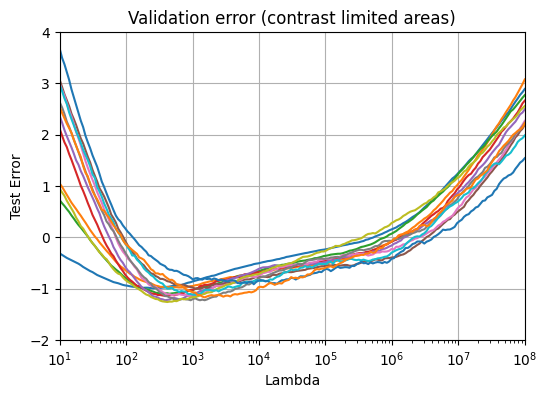

---------------------------
/fast/mbonse/s4/30_data/HD22049_310_0100_C-0656_A_.hdf5
---------------------------
Loading data ... [DONE]
S4 model: validating noise model ... S4 Noise: validating noise model ... Compute validation positions for separation 3.4615384615384617 ...
Compute betas for separation 3.4615384615384617 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:00<00:00,  6.03s/it]


Re-mask betas for separation 3.4615384615384617 ...
Compute validation errors for separation 3.4615384615384617 ...
Compute validation positions for separation 6.923076923076923 ...
Compute betas for separation 6.923076923076923 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:00<00:00,  6.02s/it]


Re-mask betas for separation 6.923076923076923 ...
Compute validation errors for separation 6.923076923076923 ...
Compute validation positions for separation 10.384615384615385 ...
Compute betas for separation 10.384615384615385 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:00<00:00,  6.02s/it]


Re-mask betas for separation 10.384615384615385 ...
Compute validation errors for separation 10.384615384615385 ...
Compute validation positions for separation 13.846153846153847 ...
Compute betas for separation 13.846153846153847 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:00<00:00,  6.02s/it]


Re-mask betas for separation 13.846153846153847 ...
Compute validation errors for separation 13.846153846153847 ...
Compute validation positions for separation 17.307692307692307 ...
Compute betas for separation 17.307692307692307 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:00<00:00,  6.01s/it]


Re-mask betas for separation 17.307692307692307 ...
Compute validation errors for separation 17.307692307692307 ...
Compute validation positions for separation 20.76923076923077 ...
Compute betas for separation 20.76923076923077 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:00<00:00,  6.03s/it]


Re-mask betas for separation 20.76923076923077 ...
Compute validation errors for separation 20.76923076923077 ...
Compute validation positions for separation 24.230769230769234 ...
Compute betas for separation 24.230769230769234 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:00<00:00,  6.03s/it]


Re-mask betas for separation 24.230769230769234 ...
Compute validation errors for separation 24.230769230769234 ...
Compute validation positions for separation 27.692307692307693 ...
Compute betas for separation 27.692307692307693 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:00<00:00,  6.02s/it]


Re-mask betas for separation 27.692307692307693 ...
Compute validation errors for separation 27.692307692307693 ...
Compute validation positions for separation 31.153846153846153 ...
Compute betas for separation 31.153846153846153 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:00<00:00,  6.02s/it]


Re-mask betas for separation 31.153846153846153 ...
Compute validation errors for separation 31.153846153846153 ...
Compute validation positions for separation 34.61538461538461 ...
Compute betas for separation 34.61538461538461 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:00<00:00,  6.02s/it]


Re-mask betas for separation 34.61538461538461 ...
Compute validation errors for separation 34.61538461538461 ...
Compute validation positions for separation 38.07692307692308 ...
Compute betas for separation 38.07692307692308 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:00<00:00,  6.02s/it]


Re-mask betas for separation 38.07692307692308 ...
Compute validation errors for separation 38.07692307692308 ...
Compute validation positions for separation 41.53846153846154 ...
Compute betas for separation 41.53846153846154 ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:00<00:00,  6.02s/it]


Re-mask betas for separation 41.53846153846154 ...
Compute validation errors for separation 41.53846153846154 ...
Recommended Lambda = 683.92
Make sure to check if the tested range of lambda values is covering the global minimum!
[DONE]
[DONE]


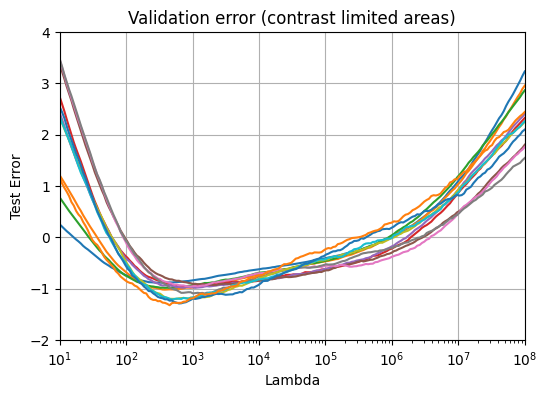

In [3]:
all_results_final = dict()

for tmp_dataset in datasets:
    print("---------------------------")
    print(tmp_dataset)
    print("---------------------------")
    # 1.) Load the dataset
    print("Loading data ... ", end='')
    science_data, raw_angles, raw_psf_template_data = load_adi_data(
        tmp_dataset,
        data_tag="object_stacked_05",
        psf_template_tag="psf_template",
        para_tag="header_object_stacked_05/PARANG") 

    print("[DONE]")

    cut_off = int((science_data.shape[1] - 91) / 2)
    science_data = science_data[:, cut_off:-cut_off, cut_off:-cut_off]
    psf_template = np.median(raw_psf_template_data, axis=0)

    # 2.) Create the model
    s4_model = S4(
        science_cube=science_data,
        adi_angles=raw_angles,
        psf_template=psf_template,
        device=0,
        work_dir=None,
        verbose=True,
        rotation_grid_subsample=1,
        noise_cut_radius_psf=None,
        noise_mask_radius=None,
        noise_model_lambda_init=1e3,
        noise_model_convolve=True)
    
    # 3.) Find the lambdas
    lambdas = np.logspace(1, 8, 200)
    all_results, best_lambda = s4_model.validate_lambdas_noise(
        num_separations=12, 
        lambdas=lambdas,
        num_test_positions=10,
        test_size=0.3,
        approx_svd=5000)

    # 4.) Plot the result
    merged_results = np.array([i for i in all_results.values()])
    all_results_final[tmp_dataset] = (all_results, best_lambda)
    
    fig, (ax1) = plt.subplots(1, 1, figsize=(6, 4))

    ax1.plot(lambdas, np.array(merged_results).T)
    ax1.set_title("Validation error (contrast limited areas)")
    ax1.set_xlabel("Lambda")
    ax1.set_ylabel("Test Error")
    ax1.set_xscale("log")
    ax1.grid()
    ax1.set_ylim(-2, 4)
    ax1.set_xlim(1e1, 1e8)
    plt.show()

In [4]:
dataset = datasets[1]
separations = np.array(list(all_results_final[dataset][0].keys()))
best_lambda = np.array([lambdas[list(all_results_final[dataset][0].values())[i].argmin()] for i in range(len(separations))])

In [5]:
x = separations
y = best_lambda
z = np.polyfit(x, np.log(y), 0)
p = np.poly1d(z)

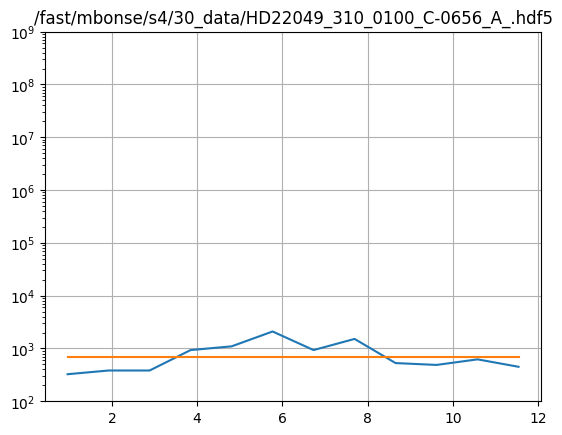

In [6]:
plt.plot(separations / 3.6, best_lambda)
plt.plot(separations / 3.6, np.exp(p(separations)))
plt.yscale("log")
plt.title(dataset)
plt.ylim(1e2, 1e9)
plt.grid()